In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:

session_csv_file = "..//data//COGEDwideformat.csv"
df = pd.read_csv(session_csv_file, sep=";", decimal=",")

def change_session_to_condition(row, parameter="aip", condition="active", remove_baseline=False):
    
    if condition == "active":
        if row.cond_T2 == "CS":
            value = row["{}_T2".format(parameter)]
        else:
            value = row["{}_T3".format(parameter)]
            
    elif condition == "inactive":
        if row.cond_T2 == "CS":
            value = row["{}_T3".format(parameter)]
        else:
            value = row["{}_T2".format(parameter)]
    
    if remove_baseline:
        return value - row["{}_T1".format(parameter)]
    else:
        return value

def tweak_df(df, parameter="aip"):
    
    return (df
            .rename(columns={"aip.1st test": "aip_T1",
                             "condition.2nd test": "cond_T2",
                             "condition.3rd test": "cond_T3",
                             "values.winAmountTotal.1st test": "win_T1",
                             "values.winAmountTotal.2nd test": "win_T2",
                             "values.winAmountTotal.3rd test": "win_T3",
                             "dprime.1st test": "dprime_T1",
                             "dprime.2nd test": "dprime_T2",
                             "dprime.3rd test": "dprime_T3"})
#             .apply(change_session_to_condition, axis=1)
            .assign(active=lambda df_: df_.apply(change_session_to_condition, parameter=parameter, condition="active", axis=1),
                  inactive=lambda df_: df_.apply(change_session_to_condition, parameter=parameter, condition="inactive", axis=1))
            .loc[:,["ID", "groups", "order", "active", "inactive"]]
           )

aip = tweak_df(df, parameter="aip")
win = tweak_df(df, parameter="win")
dprime = tweak_df(df, parameter="dprime")

In [3]:
aip

,ID,groups,order,active,inactive
0,2009,CS-CXS,CS first,1.296875,1.281250
1,2036,CS-DCS,CS last,1.953125,1.398438
2,2054,CS-CXS,CS first,1.187500,1.226562
3,2063,CS-DCXS,CS first,1.593750,1.375000
4,2072,CS-CXS,CS last,1.953125,1.812500
...,...,...,...,...,...
56,9068,CS-DCXS,CS last,0.015625,0.265625
57,9085,CS-DCS,CS first,1.242188,1.500000
58,9136,CS-DCXS,CS first,1.742188,1.609375
59,9245,CS-DCS,CS last,1.984375,1.265625


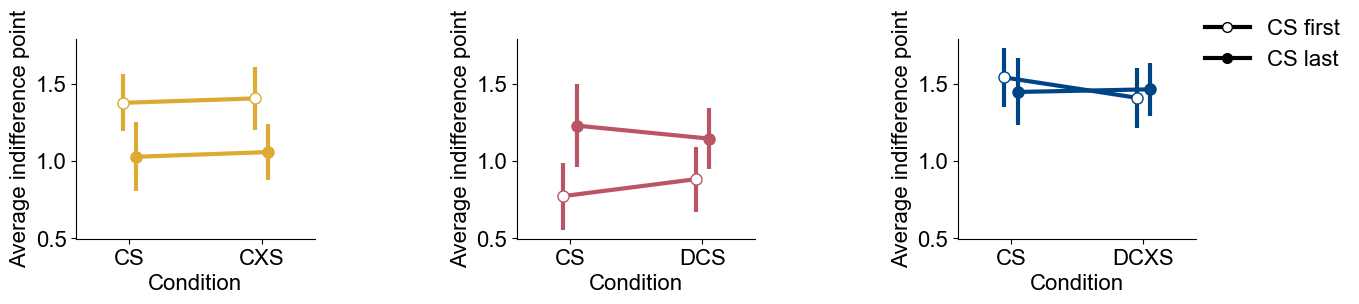

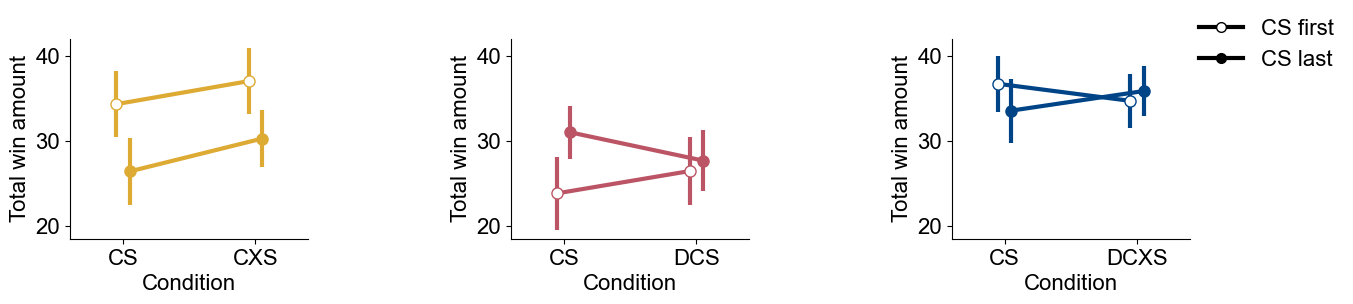

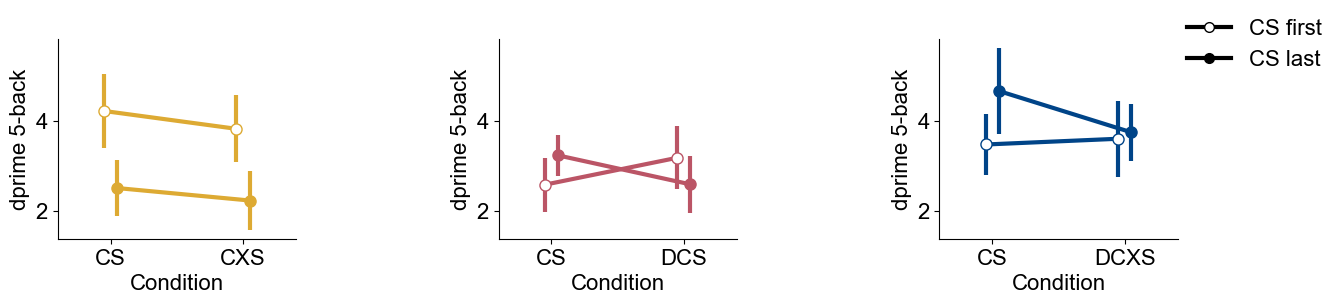

In [7]:
cs_cxs_color = "#DDAA33"
cs_dcs_color = "#BB5566"
cs_dcxs_color = "#004488"

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
matplotlib.rc('lines', linewidth=3)

# plt.rcParams['savefig.dpi'] = 300

def make_condition_fig(df, groups, color="k", size=8, ax=None, ylabel="", legend=False, alignyaxes=False):
    
    if ax == None:
        f, ax = plt.subplots()
        
    reduced_df = df.query("groups == @groups")

    cs_first = reduced_df.query("order == 'CS first'")
    cs_last = reduced_df.query("order == 'CS last'")

    x = [0,1]
    x1 = [x_-0.05 for x_ in x]
    ax.errorbar(x1, [cs_first.active.mean(), cs_first.inactive.mean()],
                yerr=[cs_first.active.sem(), cs_first.inactive.sem()],
                marker="o",
                color=color,
                markersize=size,
                markerfacecolor="white",
                # label="CS first"
           )
    x2 = [x_+0.05 for x_ in x]
    ax.errorbar(x2, [cs_last.active.mean(), cs_last.inactive.mean()],
                yerr=[cs_last.active.sem(), cs_last.inactive.sem()],
                marker="o",
                markersize=size,
                color=color,
                # label="CS last"
           )
    
    offset = 0.4
    ax.set_xlim([0-offset, 1+offset])
    ax.set_xlabel("Condition")
    ax.set_xticks([0,1], labels=groups.split("-"))
    
    ax.yaxis.set_tick_params(labelbottom=True)
    
    if alignyaxes:
        for tick in ax.yaxis.get_majorticklabels():
            tick.set_horizontalalignment("left")
            tick.set_x(-0.07)
    
    ax.set_ylabel(ylabel)
    
    if legend:
        ax.legend(loc=(1,0.8), frameon=False)
    
### AIP graph ###

ylabel = "Average indifference point"

f, ax = plt.subplots(ncols=3,
                     figsize=(14, 4),
                     sharey=True,
                     gridspec_kw={"wspace": 0.85,
                                  "top": 0.8,
                                  "left": 0.05,
                                  "right": 0.85,
                                  "bottom": 0.3})

make_condition_fig(aip, "CS-CXS", ax=ax[0], color=cs_cxs_color, ylabel=ylabel)

make_condition_fig(aip, "CS-DCS", ax=ax[1], color=cs_dcs_color, ylabel=ylabel)

make_condition_fig(aip, "CS-DCXS", ax=ax[2], color=cs_dcxs_color, ylabel=ylabel)

for axis in ax:
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)

# For legend
ax[2].errorbar([],[], marker="o", color="k", markerfacecolor="white", markersize=7, label="CS first")
ax[2].errorbar([],[], marker="o", color="k", markersize=7, label="CS last")
ax[2].legend(loc=(1,0.8), frameon=False)

f.savefig("..//results//aip_for_poster.png")

### win graph ###

ylabel = "Total win amount"

f, ax = plt.subplots(ncols=3,
                     figsize=(14, 4),
                     sharey=True,
                     gridspec_kw={"wspace": 0.85,
                                  "top": 0.8,
                                  "left": 0.05,
                                  "right": 0.85,
                                  "bottom": 0.3})

make_condition_fig(win, "CS-CXS", ax=ax[0], color=cs_cxs_color, ylabel=ylabel)

make_condition_fig(win, "CS-DCS", ax=ax[1], color=cs_dcs_color, ylabel=ylabel)

make_condition_fig(win, "CS-DCXS", ax=ax[2], color=cs_dcxs_color, ylabel=ylabel)

for axis in ax:
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)

# For legend
ax[2].errorbar([],[], marker="o", color="k", markerfacecolor="white", markersize=7, label="CS first")
ax[2].errorbar([],[], marker="o", color="k", markersize=7, label="CS last")
ax[2].legend(loc=(1,0.8), frameon=False)

f.savefig("..//results//win_for_poster.png")

### dprime graph ###

ylabel = "dprime 5-back"

f, ax = plt.subplots(ncols=3,
                     figsize=(14, 4),
                     sharey=True,
                     gridspec_kw={"wspace": 0.85,
                                  "top": 0.8,
                                  "left": 0.05,
                                  "right": 0.85,
                                  "bottom": 0.3})

make_condition_fig(dprime, "CS-CXS", ax=ax[0], color=cs_cxs_color, ylabel=ylabel)

make_condition_fig(dprime, "CS-DCS", ax=ax[1], color=cs_dcs_color, ylabel=ylabel)

make_condition_fig(dprime, "CS-DCXS", ax=ax[2], color=cs_dcxs_color, ylabel=ylabel)

for axis in ax:
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)

# For legend
ax[2].errorbar([],[], marker="o", color="k", markerfacecolor="white", markersize=7, label="CS first")
ax[2].errorbar([],[], marker="o", color="k", markersize=7, label="CS last")
ax[2].legend(loc=(1,0.8), frameon=False)

f.savefig("..//results//dprime_for_poster.png")

In [8]:
ax.xaxis.set_tick_params(labelbottom=True)

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

In [ ]:
reduced_df.query("order == 'CS first'")

In [53]:
dprime.to_csv("..//results/dprime.csv")

In [45]:
df.columns

Index(['ID', 'group', 'groups', 'order', 'dprime.1st test',
       'values.winAmountTotal.1st test', 'aip.1st test',
       'drinkcontainscaffeine.1st test', 'drinkcontainssugar.1st test',
       'beliefPerformanceCOGED.1st test', 'condition.1st test',
       'sugargroup.1st test', 'caffeinegroup.1st test', 'dprime.2nd test',
       'values.winAmountTotal.2nd test', 'aip.2nd test', 'aip_T2',
       'drinkcontainscaffeine.2nd test', 'drinkcontainssugar.2nd test',
       'beliefPerformanceCOGED.2nd test', 'condition.2nd test',
       'sugargroup.2nd test', 'caffeinegroup.2nd test', 'dprime.3rd test',
       'values.winAmountTotal.3rd test', 'aip.3rd test', 'aip_T3',
       'drinkcontainscaffeine.3rd test', 'drinkcontainssugar.3rd test',
       'beliefPerformanceCOGED.3rd test', 'condition.3rd test',
       'sugargroup.3rd test', 'caffeinegroup.3rd test,,,,,,,,,,,'],
      dtype='object')

In [54]:


dprime.active

0     2.136826
1     4.985467
2     2.682235
3     1.041999
4     0.171193
        ...   
56    1.505816
57    2.152954
58    3.132765
59    2.829112
60    5.649957
Name: active, Length: 61, dtype: float64